Using the repository cloned from: 

```
git clone https://github.com/matterport/Mask_RCNN.git
```

Setup:

```
cd Mask_RCNN
python setup.py install
pip show mask-rcnn
```

Download project weights (246mb) to your current working directory:

https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

Example based upon: https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/

In [ ]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)

In [5]:
# load photograph
img = load_img('boat.png')
img = img_to_array(img)

In [6]:
# make prediction
results = rcnn.detect([img], verbose=0)

In [7]:
print(results)

[{'rois': array([[128, 100, 465, 595],
       [114,   0, 138,  62],
       [126, 321, 141, 365],
       [ 91, 155, 128, 201],
       [156, 255, 174, 278],
       [ 54, 351, 142, 411],
       [ 91,  53, 132,  98],
       [179, 133, 187, 162],
       [ 65, 323, 138, 366],
       [106, 211, 128, 284],
       [174, 166, 183, 184]]), 'class_ids': array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]), 'scores': array([0.9995222 , 0.9209113 , 0.8981745 , 0.89637977, 0.87862086,
       0.8546243 , 0.8416052 , 0.8323974 , 0.82312757, 0.8169852 ,
       0.71960706], dtype=float32), 'masks': array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [Fa

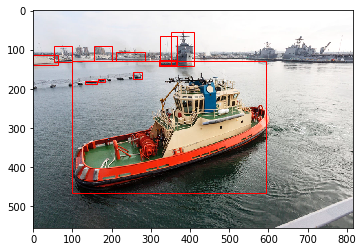

In [8]:
# visualize the results
draw_image_with_boxes('boat.png', results[0]['rois'])

In [9]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

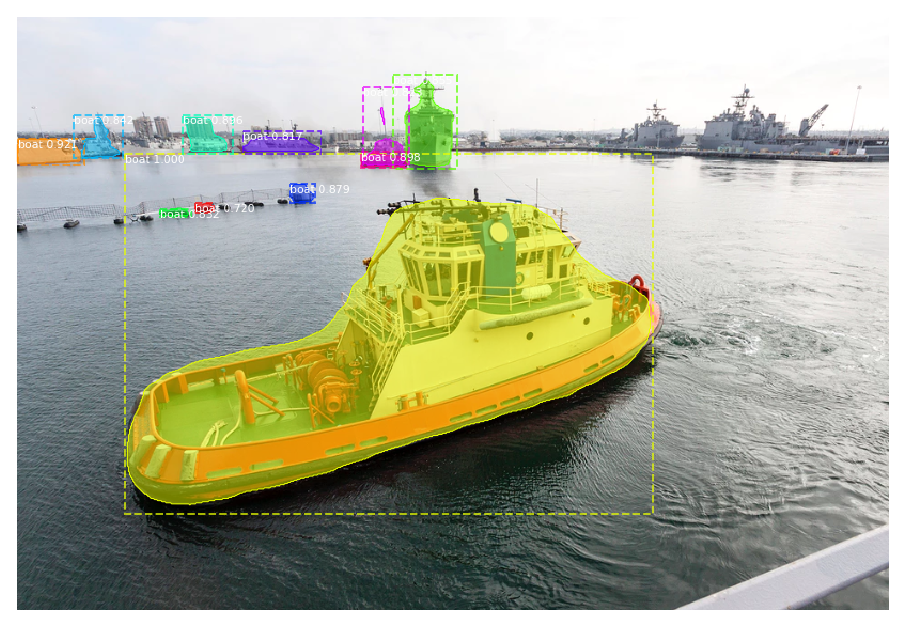

In [11]:
from mrcnn.visualize import display_instances

# get dictionary for first prediction
r = results[0]
# use MsakRCNN funtion to show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])